# NLP 3 - WordCloud

You will take your notebook from the previous quest, and make 4 different WordClouds:

1. A WordCloud from the initial text, using the `generate_from_text` method
2. A WordCloud using the `generate_from_frequencies` method after cleaning up stopwords and punctuation.
3. A WordCloud thanks to the `generate_from_frequencies` method after cleaning up stopwords and punctuation, and applying a __stemmer__.
4. A WordCloud using the `generate_from_frequencies` method after cleaning up stopwords and punctuation, and applying a __lemmatizer__.

## Preparation


* Import NLTK and download the features you'll need (as you go along if necessary).

In [54]:
import re
import matplotlib.pyplot as plt

import nltk
from nltk.probability import FreqDist

from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pivanov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Retrieve the text of a press article of your choice from the internet (in English it will be simpler, but you can take the language of your choice). Assign it to a variable via copy/paste. For the rest of this quest, we advise you to take a text that is between 10 and 30 lines long. 

In [55]:
# Longer text taken from:
# https://edition.cnn.com/2021/09/27/health/us-coronavirus-monday/index.html
text = 'The daily pace of new Covid-19 vaccinations in the United States is the lowest it has been since the Centers for Disease Control and Prevention started tracking it in mid-January, data shows.\nThe seven-day average rate of people getting their first shot is 231,695, 31% less than last week, almost half -- 47% -- less than a month earlier -- and a far cry from the millions a day the country saw in April.\nIt\'s not that there\'s now a lack of people who are not immunized: Sixteen states have yet to vaccinate more than half of their residents, according to the CDC data, and almost 25% of the eligible population -- about 70 million people -- are not vaccinated.\n\nJust over 55% of the total US population is fully vaccinated. The number of people eligible to get a vaccine may soon be widening, though, and could boost the overall number.\n\nPfizer/BioNTech plans to ask soon for authorization of a Covid-19 vaccine for some children under 12, bringing the US one step closer to offering protection to a population that has grown particularly vulnerable as the fall season gets underway.\n"It is a question of days, not weeks," Pfizer Chairman and CEO Albert Bourla told ABC News on Sunday about when the company will submit data on children ages 5 to 11 to the US Food and Drug Administration for consideration.\n\nDr. Rochelle Walensky, director of the CDC, said on ABC\'s "Good Morning America" on Monday that the CDC will review data on vaccines for 5- to 11-year-olds with urgency.\n"We are all enthusiastically awaiting these data," Walensky said, when asked how soon authorization and shots for kids could be seen after Pfizer submits its data.'

print(text)

The daily pace of new Covid-19 vaccinations in the United States is the lowest it has been since the Centers for Disease Control and Prevention started tracking it in mid-January, data shows.
The seven-day average rate of people getting their first shot is 231,695, 31% less than last week, almost half -- 47% -- less than a month earlier -- and a far cry from the millions a day the country saw in April.
It's not that there's now a lack of people who are not immunized: Sixteen states have yet to vaccinate more than half of their residents, according to the CDC data, and almost 25% of the eligible population -- about 70 million people -- are not vaccinated.

Just over 55% of the total US population is fully vaccinated. The number of people eligible to get a vaccine may soon be widening, though, and could boost the overall number.

Pfizer/BioNTech plans to ask soon for authorization of a Covid-19 vaccine for some children under 12, bringing the US one step closer to offering protection to 

## Task 1

* A WordCloud from the initial text, using the `generate_from_text` method

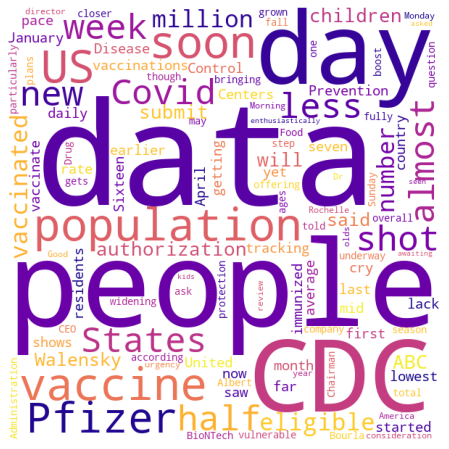

In [56]:
# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, background_color="white", colormap="plasma").generate_from_text(text)

# Display the image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Task 2

* A WordCloud using the `generate_from_frequencies` method after cleaning up stopwords and punctuation.

In [57]:
# This is how you download stopwords corpus
nltk.download("stopwords")

nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pivanov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
# Removing stopwords
text_words = [word.lower() for word in nltk.word_tokenize(text) if word.lower() not in nltk.corpus.stopwords.words("english")]

# print("Stopwords removed:")
# print(text_words)

# Removing punctuation using regex search
# pattern "^\W+$" = string composed of one or more non-word characters
#   - non-word characters are anything other than a letter, digit or underscore
text_words = [word for word in text_words if not(re.match("^\W+$", word))]

# print("\nPunctuation removed:")
# print(text_words)

In [59]:

# Creating a function to:
#   - create frequency distribution object
#   - generate wordcloud out of it
#   - display the image

def show_wc(text_list):
    fq = FreqDist(word for word in text_list)

    # Create wordcloud
    wc = WordCloud(width=600, height=600, background_color="white", colormap="viridis").generate_from_frequencies(fq)

    # Display it
    plt.figure(figsize = (8, 8))
    plt.imshow(wc)
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

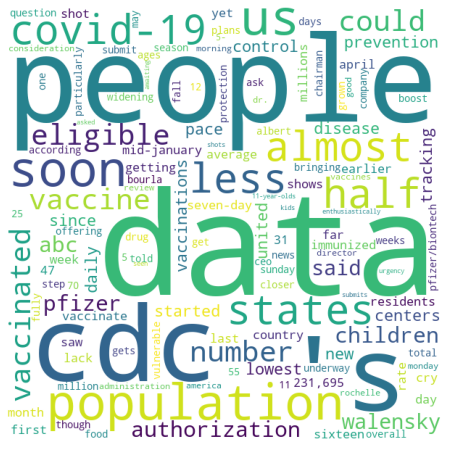

In [60]:
show_wc(text_words)

## Task 3

* A WordCloud thanks to the `generate_from_frequencies` method after cleaning up stopwords and punctuation, and applying a __stemmer__.

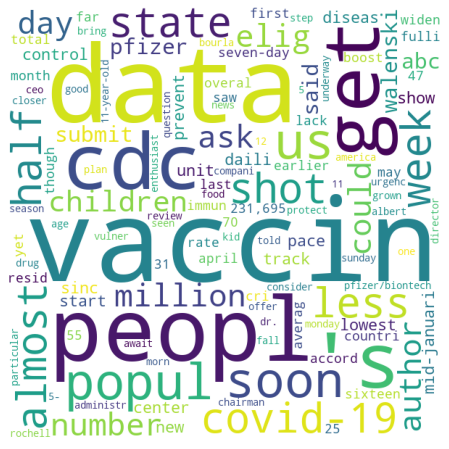

In [61]:
# Importing SnowballStemmer
from nltk.stem import SnowballStemmer

# Initializing english stemmer
stemmer = SnowballStemmer("english")

# stemming all words in text_words
text_stemmed = [stemmer.stem(word) for word in text_words]

# print(text_words)
# print(text_stemmed)

show_wc(text_stemmed)

## Task 4

* A WordCloud using the `generate_from_frequencies` method after cleaning up stopwords and punctuation, and applying a __lemmatizer__.

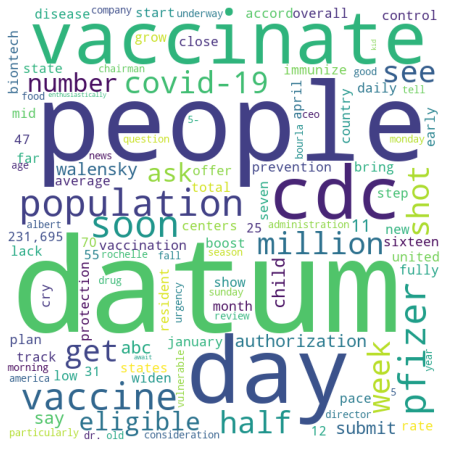

In [62]:
# Importing spaCy

# Run these once to get these packages for your kernel:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

import spacy
from spacy.tokens import Doc

# Import of English rules
nlp = spacy.load("en_core_web_sm")

# Create Doc - a sequence of Tokens
doc = nlp(text)

# I had to remove punct, whitespace and stop words again, now in spaCy style
# and to lowercase, too
words_lemmed = [token.lemma_.lower() for token in doc if not(token.is_punct) and not(token.is_stop) and not(token.is_space)]

show_wc(words_lemmed)